# loading the classes 

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42) 

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [4]:
# reading the base csv file using the custom class
df=data_cleaning('Base.csv')

In [5]:
df.data['income']= df.data['income'].astype(float)
df.data['customer_age']= df.data['income'].astype(int)
df.data['email_is_free']=df.data['email_is_free'].astype(int)
df.data['phone_home_valid']=df.data['phone_home_valid'].astype(int)
df.data['phone_mobile_valid']=df.data['phone_mobile_valid'].astype(int)
df.data['has_other_cards']=df.data['has_other_cards'].astype(int)
df.data['foreign_request']=df.data['foreign_request'].astype(int)
df.data['keep_alive_session']=df.data['keep_alive_session'].astype(int)
df.data['source']=df.data['source'].astype('object')
df.data['device_distinct_emails_8w']=df.data['device_distinct_emails_8w'].astype(int)

In [6]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,0,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,0,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,0,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,0,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,0,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### data validity:

In [7]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  int32   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

- in the data cleaning class ,we have reformated the columns to there suitable data type and deleted the device_fraud_count column as it was constant for all the records.
- we changed the age and income to category as both of them have set of 10 values only.
- and reformat the categorical columns to category to save memory also.

In [8]:
# check the number of duplicates using the custom class
df.check_duplicates()

'this data has no duplicates'

In [9]:
# describe the numerical features:
df.describe(flag='numerical')

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.562696,0.493694,16.718568,86.587867,0.0,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,...,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,3.288674
std,0.290343,0.289125,44.046230,88.406599,0.0,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,...,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,2.209994
min,0.100000,0.000001,-1.000000,-1.000000,0.0,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
1%,0.100000,0.021672,-1.000000,0.000000,0.0,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,...,0.000000,0.000000,-1.000000,0.000000,200.000000,0.000000,0.651256,0.000000,1.000000,0.000000
25%,0.300000,0.225216,-1.000000,19.000000,0.0,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,1.000000
50%,0.600000,0.492153,-1.000000,52.000000,0.0,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,3.000000
75%,0.800000,0.755567,12.000000,130.000000,0.0,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,5.000000
99%,0.900000,0.997470,231.000000,370.000000,0.0,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,...,1.000000,1.000000,31.000000,1.000000,1500.000000,1.000000,44.552828,1.000000,2.000000,7.000000
max,0.900000,0.999999,383.000000,428.000000,0.0,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


### findings from this step:
- the prev_address_month contain missing data with -ve flag we have created a function to replace the -ve values with nan according to the datasheet.
- also the current address month count have missing values and possible outliers.
- there are many columns with outliers: intended_balcon,zip_count,velocity,data_of_birth_distinct_email,proposed_credit limit and session length in minutes.

In [10]:
df.describe(flag='categorical')

,fraud_bool,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,5,7,7,2,5
top,0,AB,CA,BC,INTERNET,other
freq,988971,370554,730252,372143,992952,342728


# check the nulls:

In [11]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


- we have 5 columns with nulls according to the datasheet (where the negative value is not acceptable in those columns).
- in the next cell i use put_nulls method which will replace the -ve values in this data with nan.

In [12]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

### identify the missing values pattern:

<AxesSubplot: >

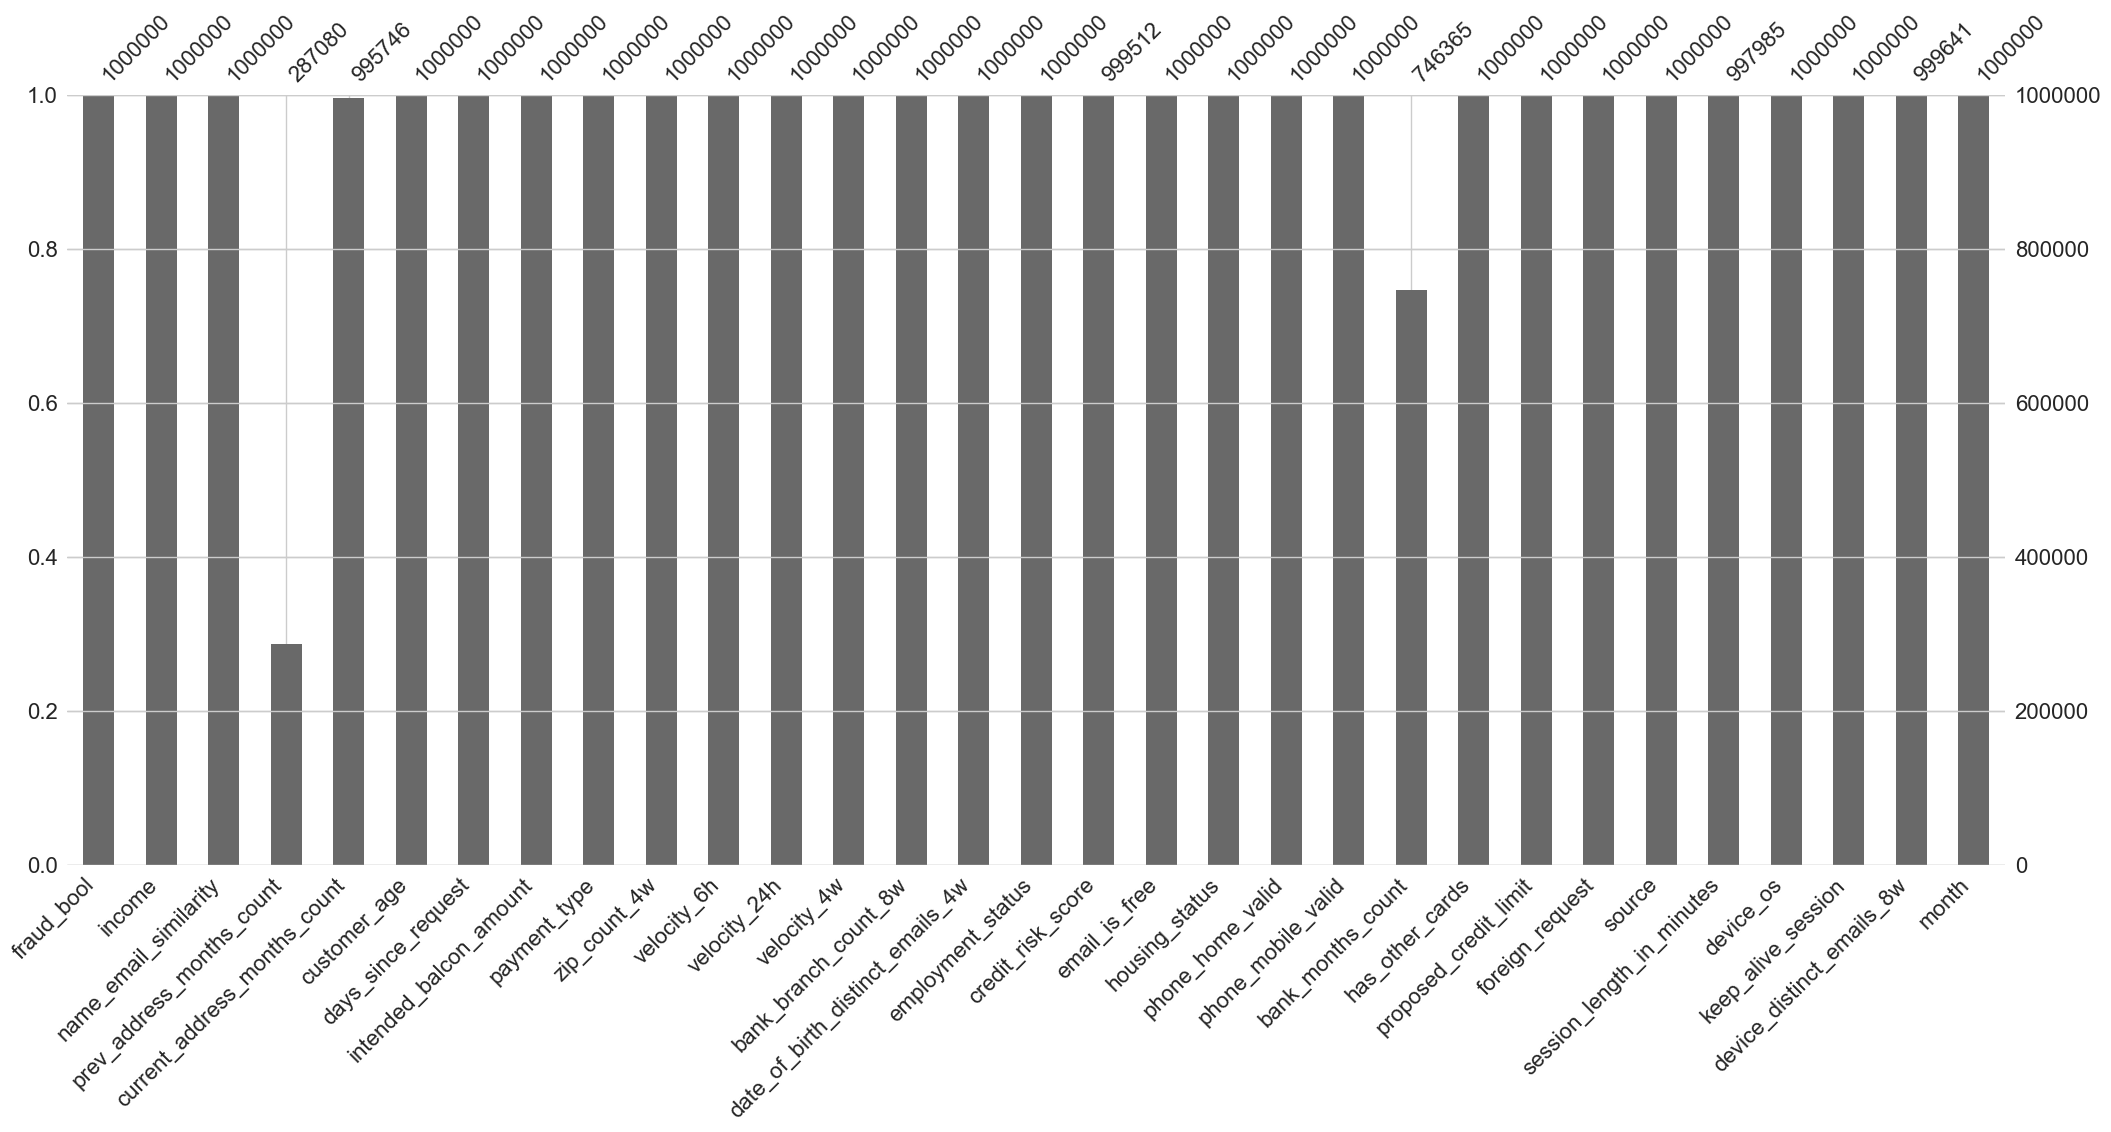

In [12]:
msno.bar(df.data)

<AxesSubplot: >

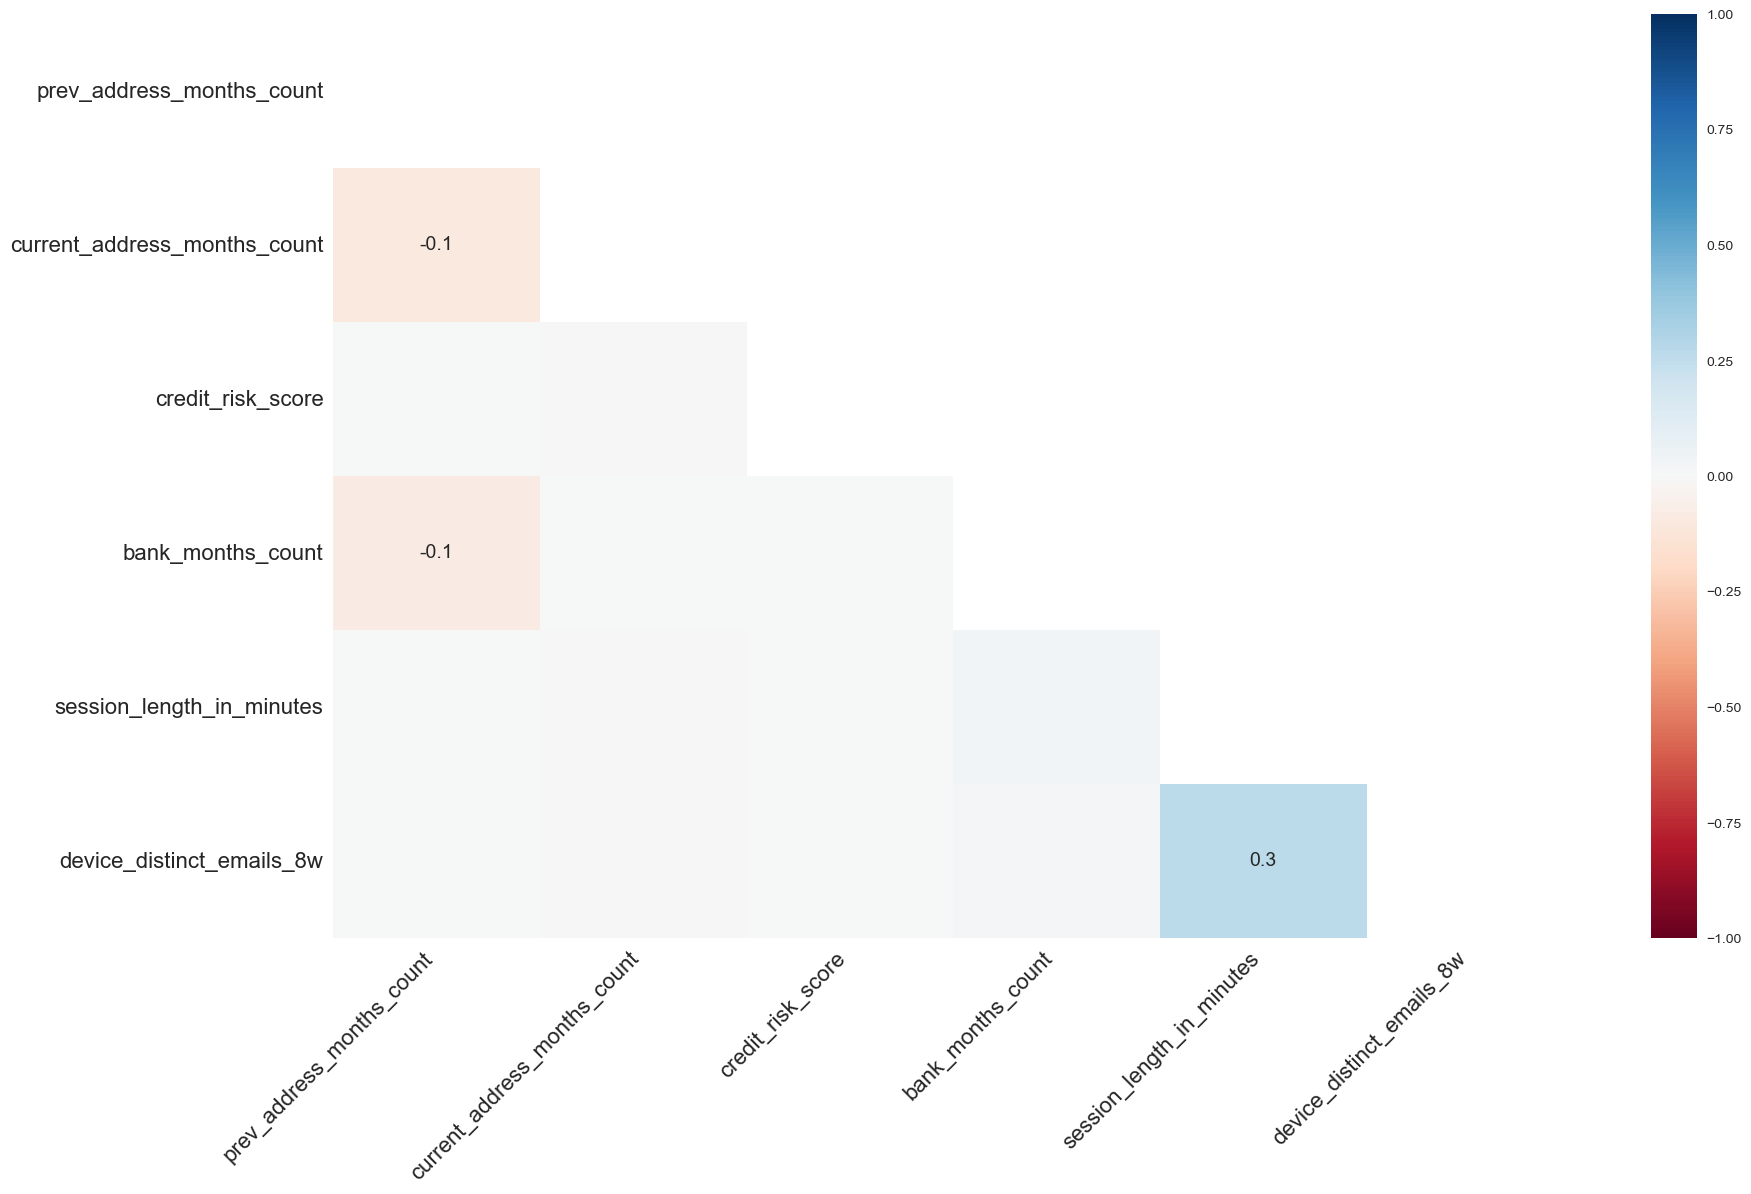

In [13]:
msno.heatmap(df.data)

- there is no correlation between the missing values. 

<AxesSubplot: >

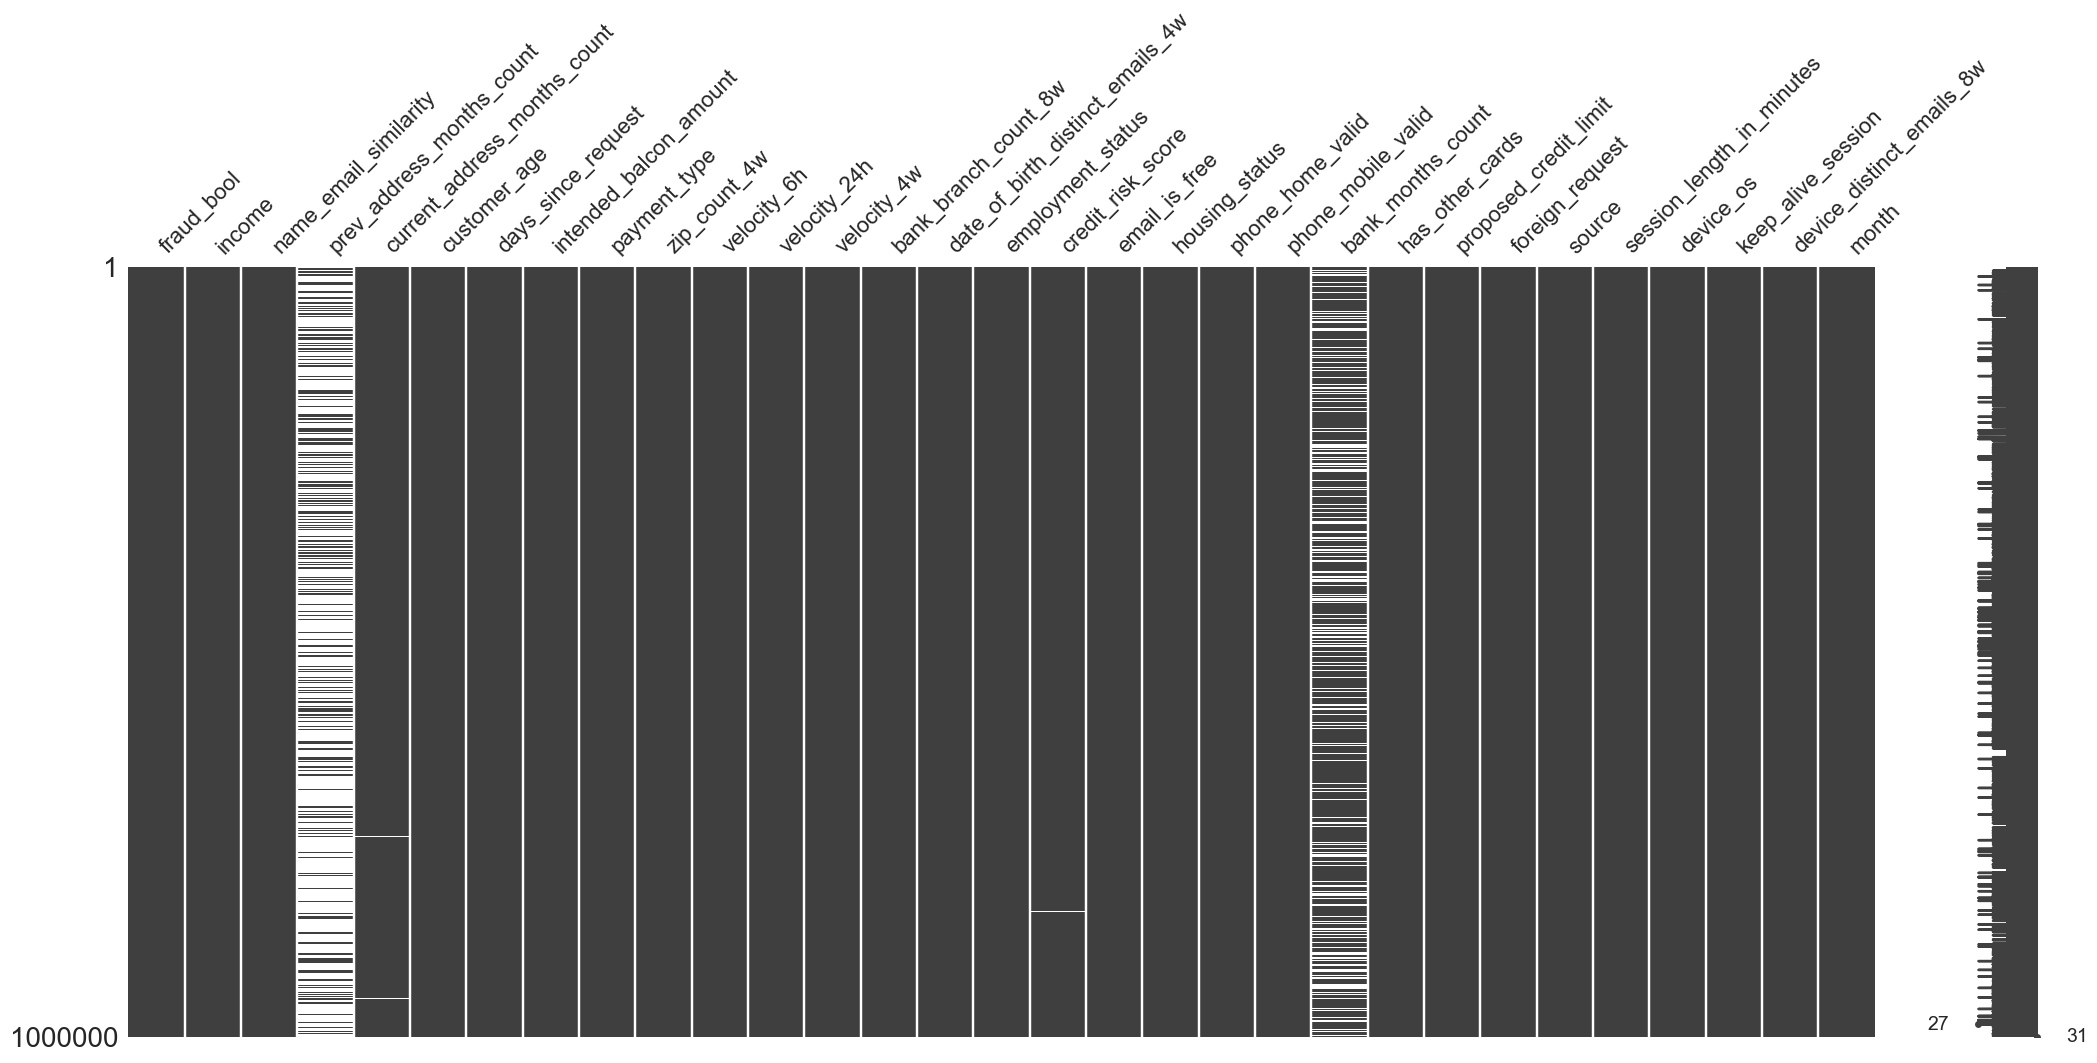

In [14]:
msno.matrix(df.data)

- after this analysis we can say that the pattern of missing values is MCAR.
- i will delete prev_address_months_count as about 70% of the rows have nulls.

In [14]:
df.delete_columns(['prev_address_months_count'])

'Columns prev_address_months_count deleted successfully.'

### Handling the nulls:
- i will replace the nulls of the continous columns with the mean, while using the mode for the categorical columns.

In [15]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['bank_months_count'].fillna(df.data.bank_months_count.mode()[0],inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

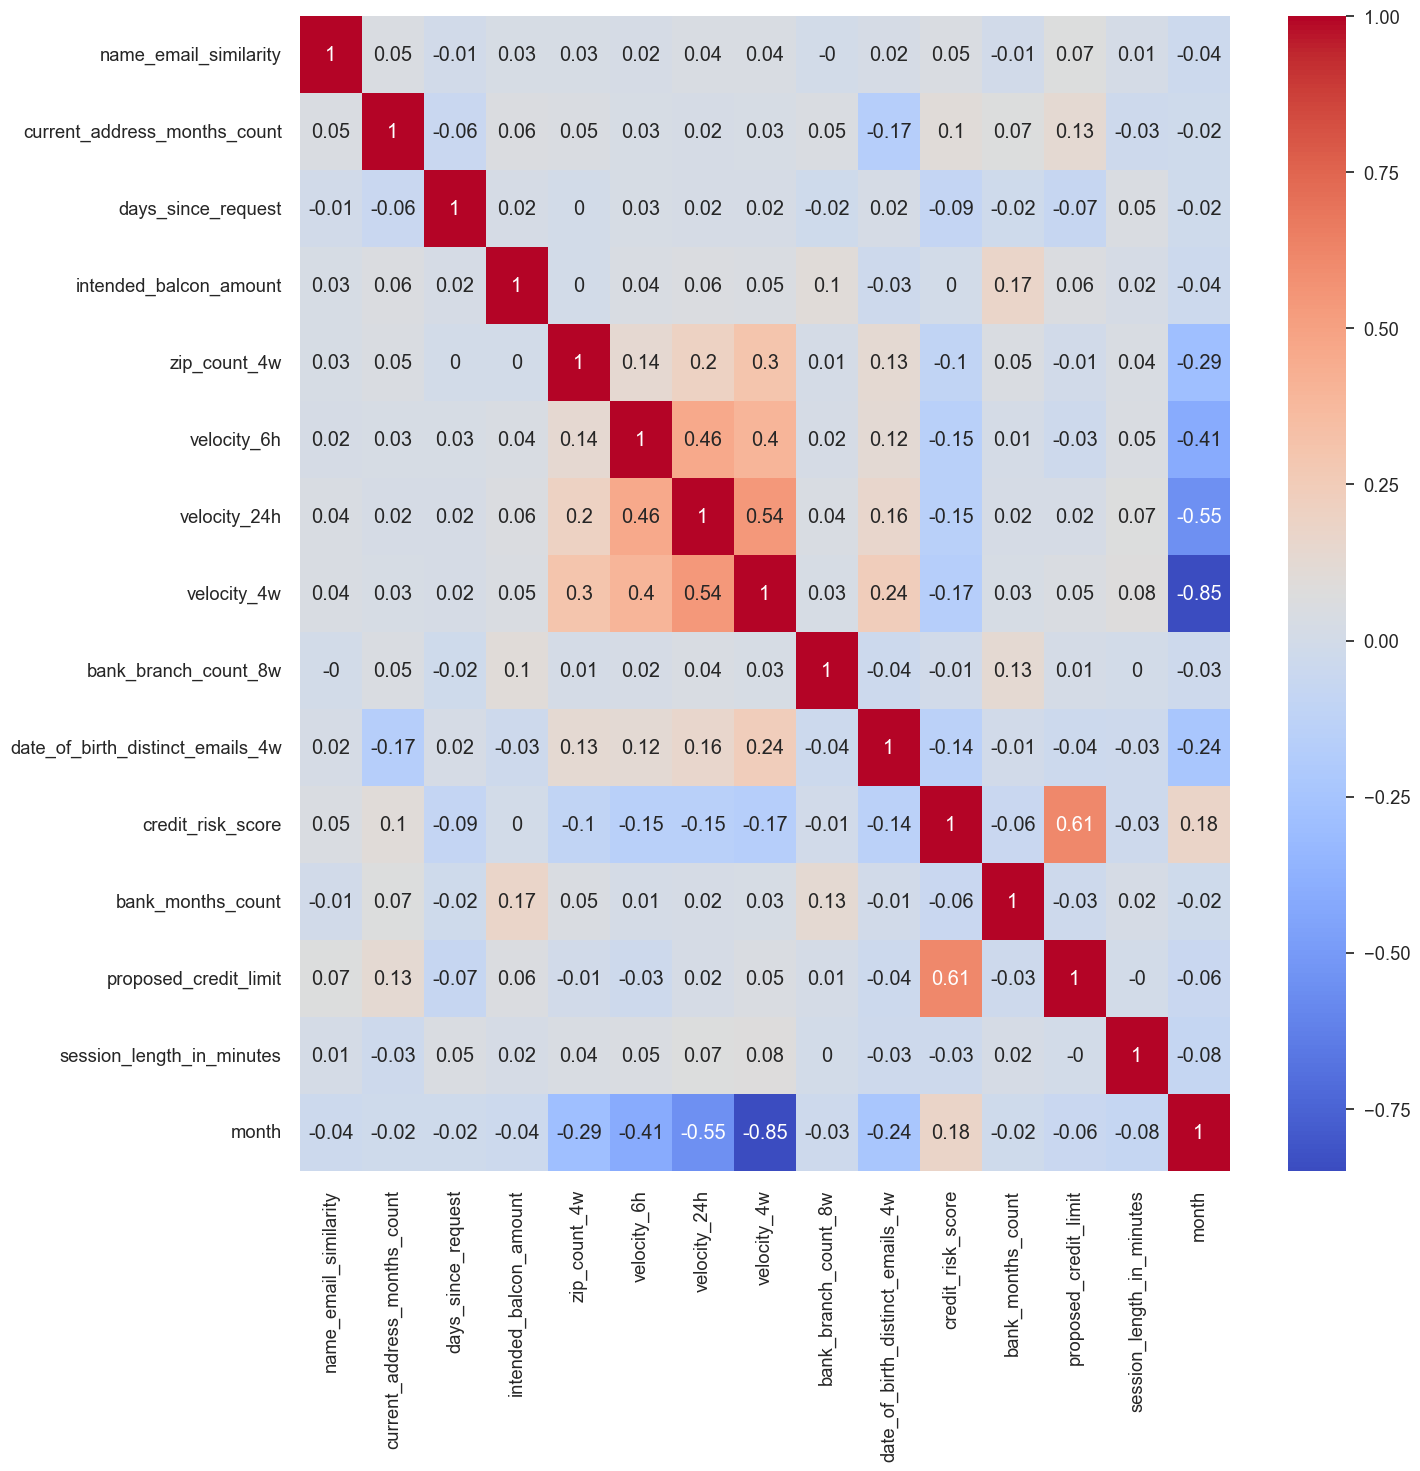

In [28]:
## check the corrrelation between the numerical columns using pearson correlation
df.plot_corr_heatmap()

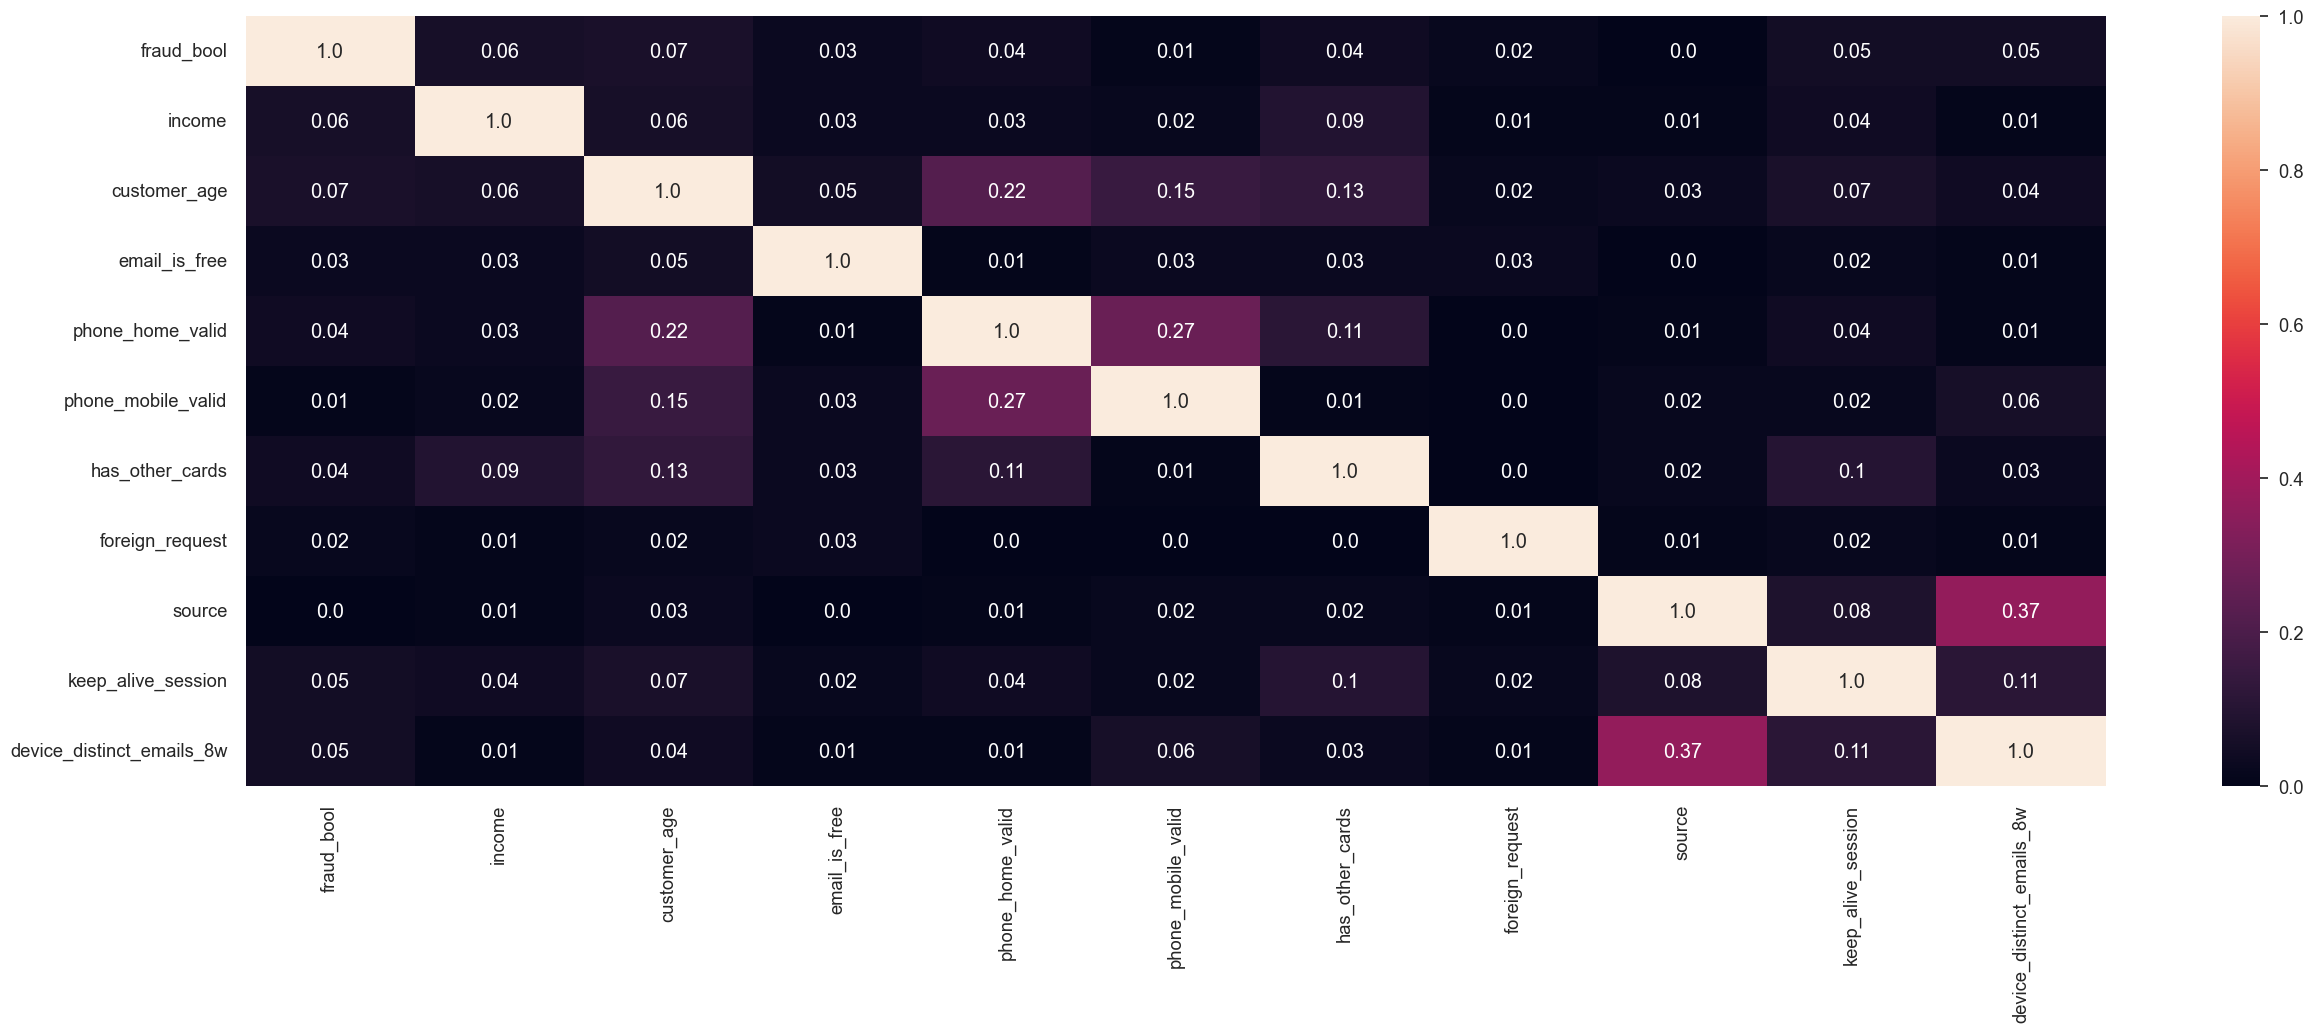

In [29]:
# checking the correlation between the categorical features including the label
df.plot_cramer()

- as we can see there is no correlation between any feature except the correlation between the month and velocity_4w columns, and we willn't pass the month feature to the model, we will only use it as a splitter as mentioned by the authors in the paper.

income                             -0.386337
velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
bank_months_count                   0.533668
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
device_distinct_emails_8w           3.126722
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


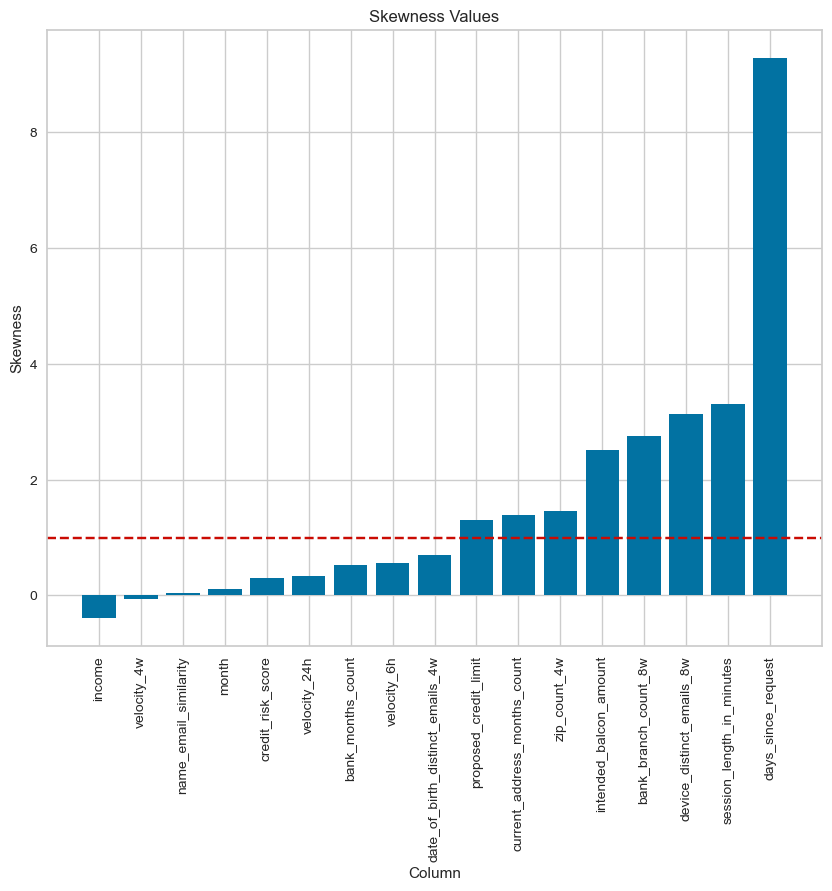

In [16]:
# checking the skewness of numerical features
skewed_columns=df.draw_skewness_barchart()

- as we can see we have many numerical features with high skewness so i will use log transform to handle the skewness.
- i will exclude the intended balcon amount as it contain negative values so the log will return nulls.

In [17]:
data=df.get_data()

### splitting the data

In [18]:
# split the data according to the paper criteria 0-5 month for training and 6-7 for testing 
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

### forming the groups to test fairness 

In [19]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

In [20]:
data = preprocessing(X_train, y_train)

## preprocessing:
- in the baseline experiments we have use the standard scaler and one hot encoding for preprocessing.
- in this experiment i will try different approach by using minmax as scaler and label encoding as encoder

In [21]:
# define a dictionary with the key is the name of the column and the value is the scaler object which is returned from the method
# in the preprocessing class.
scalers = {} 
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('robust',column)
    scalers[column] = scaler

In [22]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [23]:
# define dictionary with key name of the column and value the label encoder fitted on the training set in the preprocessing class
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

In [24]:
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)  

In [25]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [26]:
X_train,y_train=data.get_data()

In [27]:
X_train

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
96843,0.4,-0.646864,0.464286,0.0,-0.608116,-0.009979,0.369584,-1.162101,-1.040050,-0.042489,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
96844,0.4,-0.107035,0.482143,0.0,0.299080,-0.083282,-0.146773,1.165451,0.411798,-0.283497,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
96845,0.6,-0.320164,0.232143,0.0,-0.318306,0.002009,-0.456233,0.613998,0.477086,-0.256311,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96846,0.2,-0.870201,-0.223214,0.0,-0.544415,-0.040021,0.297082,0.012078,0.259323,-0.257403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96847,0.6,-0.652034,0.991071,0.0,-0.158525,0.067037,0.099912,0.583548,-0.048009,-0.082913,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,-0.573611,0.455357,0.0,0.784977,-0.025588,-0.492485,0.469449,1.776760,-0.133046,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
999996,0.4,-0.330136,-0.392857,0.0,82.830905,-0.067027,1.719717,-0.137543,-0.034903,-0.087060,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
999997,0.4,0.709099,-0.205357,0.0,0.167197,4.027825,0.142352,0.507447,0.347879,-0.679679,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
999998,0.6,0.490030,1.214286,0.0,0.002272,10.829594,0.050398,0.514578,-0.555236,-0.663515,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
cols=['income', 'name_email_similarity', 
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w','payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
        'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_BF', 'housing_status_BG', 
       'source_TELEAPP',  'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11']
X_train=X_train[cols]
X_test=X_test[cols]

In [29]:
# define modeling instance to start the experiment the modeling instance takes the data and the groups.
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

# model selection

## logistic regression:

In [32]:
# use the best hyperparameter values which we get from step 1
param_grid = {'class_weight':['balanced'],
             'penalty': ['l2'],
             'C': [0.01]}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.01}
Best estimator: LogisticRegression(C=0.01, class_weight='balanced')
Best score: 0.8562845914837535
AUC: 0.860210823767439
TPR:  45.519999999999996% 
FPR:  5.0% 
Threshold:  0.75
Predictive Equality:  100.0%


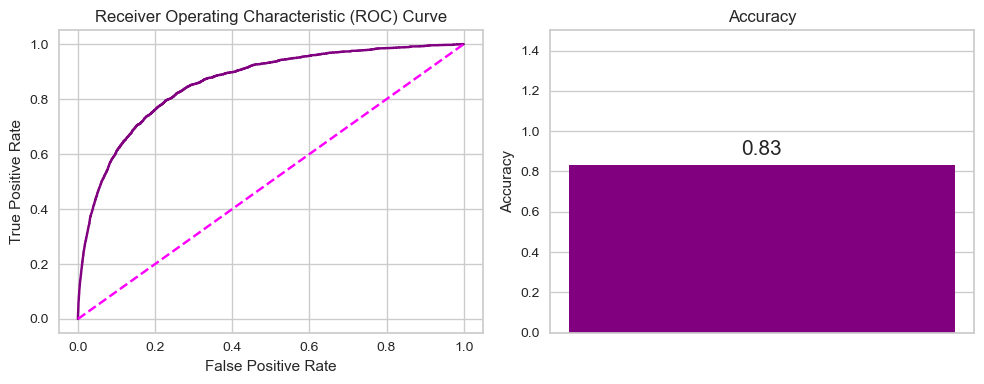

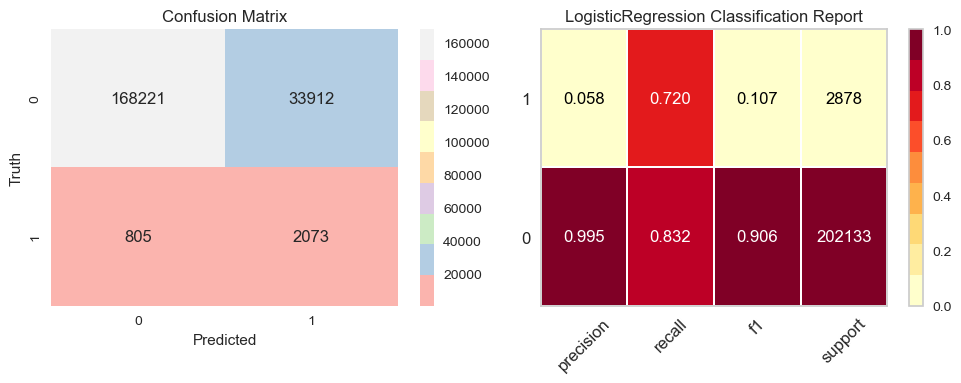

CPU times: total: 35.6 s
Wall time: 14.2 s


In [33]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

In [35]:
saved_model_path = experiment.save_model('pipeline_4_models/logistic_regression_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/logistic_regression_model.pkl


In [36]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.75, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.45      0.18      2878

    accuracy                           0.94    205011
   macro avg       0.55      0.70      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[192351   9782]
 [  1593   1285]]


# random forest:

In [37]:
# Define the hyperparameter gained from step 1
param_grid = {
    'n_estimators': [150],              # Number of trees in the forest - Default value is 100
    'max_depth': [10],                # Maximum depth of the trees - Default value is None (unlimited)
    'min_samples_split': [5],           # Minimum number of samples required to split an internal node - Default value is 2
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=150)
Best score: 0.8743409691200381
AUC: 0.871224036718584
TPR:  47.12% 
FPR:  4.96% 
Threshold:  0.63
Predictive Equality:  100.0%


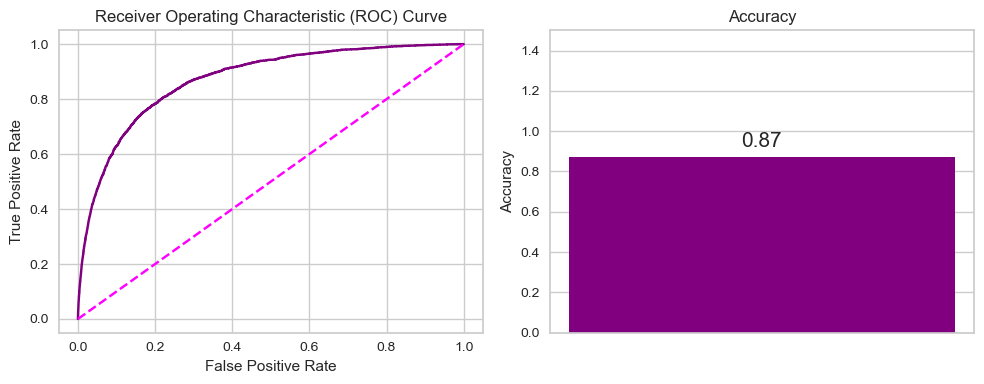

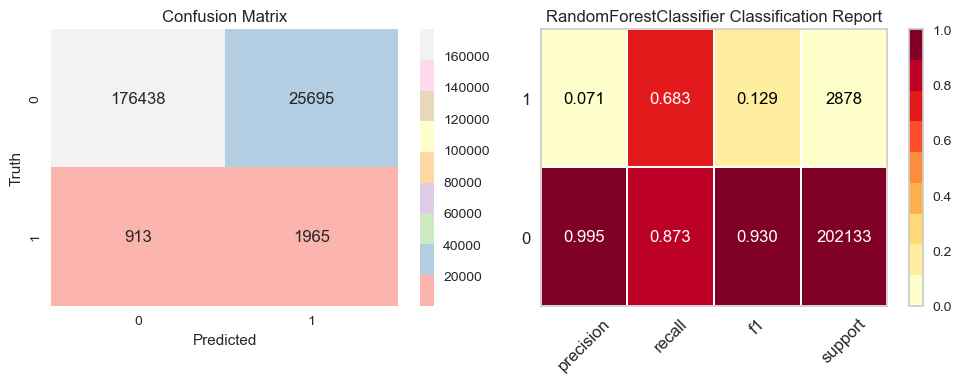

CPU times: total: 4min 11s
Wall time: 7min 13s


In [38]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [39]:
saved_model_path = experiment.save_model('pipeline_4_models/random_forest_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/random_forest_model.pkl


In [40]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.63, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.48      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.55      0.71      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[191796  10337]
 [  1510   1368]]


# XGboost

In [30]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'scale_pos_weight': [89.67005],     # Class weight for handling imbalanced datasets
    'n_estimators':[200],
    'max_depth':[5],
    
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'scale_pos_weight': 89.67005, 'n_estimators': 200, 'max_depth': 5, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, max_depth=5, n_estimators=200,
              scale_pos_weight=89.67005)
Best score: 0.8898471732734939
AUC: 0.8844622053677997
TPR:  52.470000000000006% 
FPR:  5.0% 
Threshold:  0.75
Predictive Equality:  100.0%


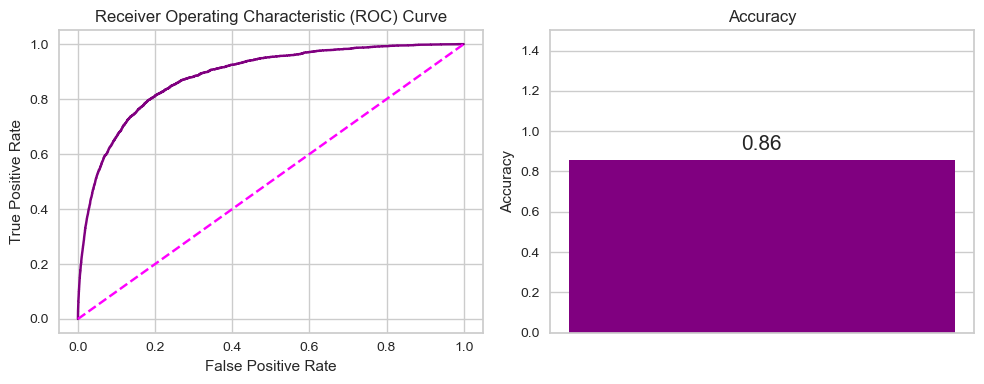

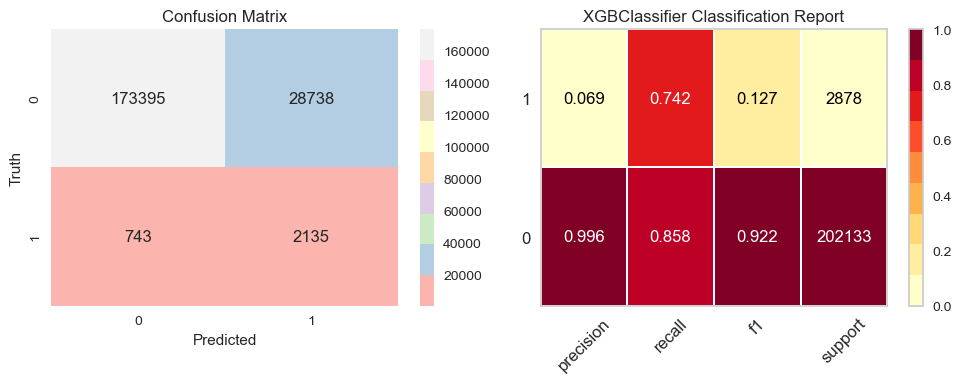

CPU times: total: 6min 50s
Wall time: 12min 1s


In [31]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [33]:
saved_model_path = experiment.save_model('pipeline_4_models/xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/xgboost.pkl


In [34]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.75, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.53      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.74      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191785  10348]
 [  1353   1525]]


# using Deep learning

In [35]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
experiment_n=nn_modeling(nn_model, X_train,X_test,y_train,y_test,train_groups,test_groups)

In [37]:
%%time
hist = experiment_n.compile_and_train(lr = 1e-2)

Epoch 1/100
1398/1398 [==============================] - 8s 4ms/step - loss: 1.1115 - fn: 1765.0000 - fp: 195872.0000 - tn: 511467.0000 - tp: 6386.0000 - precision: 0.0316 - recall: 0.7835 - f1: 0.0653 - val_loss: 0.6251 - val_fn: 0.0000e+00 - val_fp: 18853.0000 - val_tn: 60646.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
1398/1398 [==============================] - 6s 4ms/step - loss: 1.0126 - fn: 1808.0000 - fp: 147371.0000 - tn: 559968.0000 - tp: 6343.0000 - precision: 0.0413 - recall: 0.7782 - f1: 0.0794 - val_loss: 0.6255 - val_fn: 0.0000e+00 - val_fp: 19857.0000 - val_tn: 59642.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
1398/1398 [==============================] - 6s 4ms/step - loss: 0.9966 - fn: 1691.0000 - fp: 149142.0000 - tn: 558197.0000 - tp: 6460.0000 - precision: 0.0415 - recall: 0.7925 - f1: 0.0799 - val_loss: 0.4068 - val_fn: 0.0000e+00 

6407/6407 [==============================] - 4s 665us/step
AUC: 0.8835960545755197
TPR:  51.39% 
FPR:  5.0% 
Threshold:  0.96
Predictive Equality:  100.0%


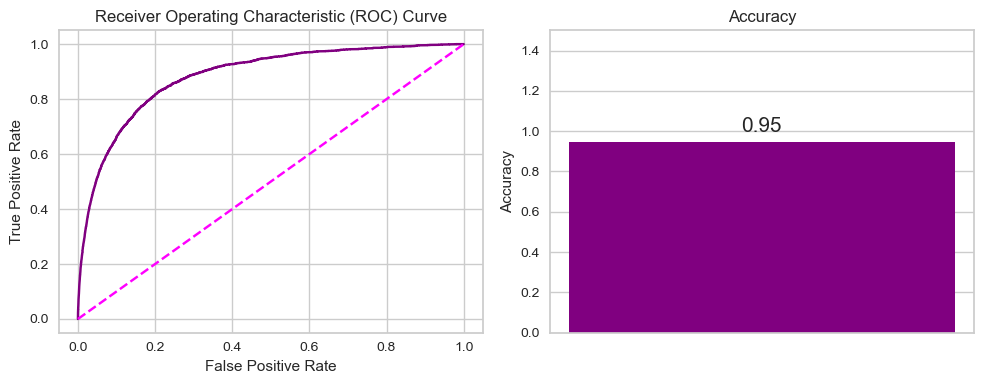

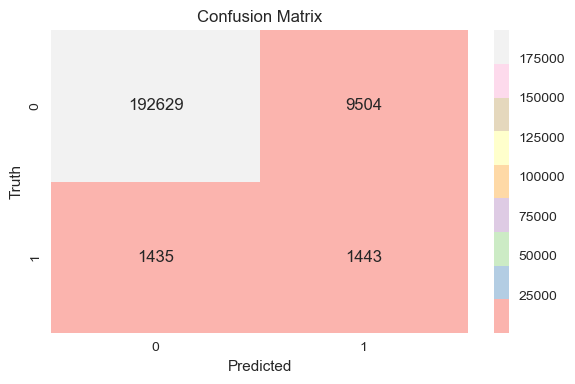

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.50      0.21      2878

    accuracy                           0.95    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.95      0.96    205011



In [38]:
experiment_n.score_keras_model()

In [39]:
saved_model_path = experiment_n.save_model('pipeline_4_models/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: pipeline_4_models/deeplearning\assets


INFO:tensorflow:Assets written to: pipeline_4_models/deeplearning\assets


Model saved at: pipeline_4_models/deeplearning


In [40]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.96, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    202133
           1       0.38      0.10      0.15      2878

    accuracy                           0.99    205011
   macro avg       0.68      0.55      0.57    205011
weighted avg       0.98      0.99      0.98    205011

[[201679    454]
 [  2604    274]]


# Ada boost:


In [41]:
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost
param_grid = {
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.8876617741272788
AUC: 0.8850090083560428
TPR:  52.5% 
FPR:  5.0% 
Threshold:  0.48
Predictive Equality:  100.0%


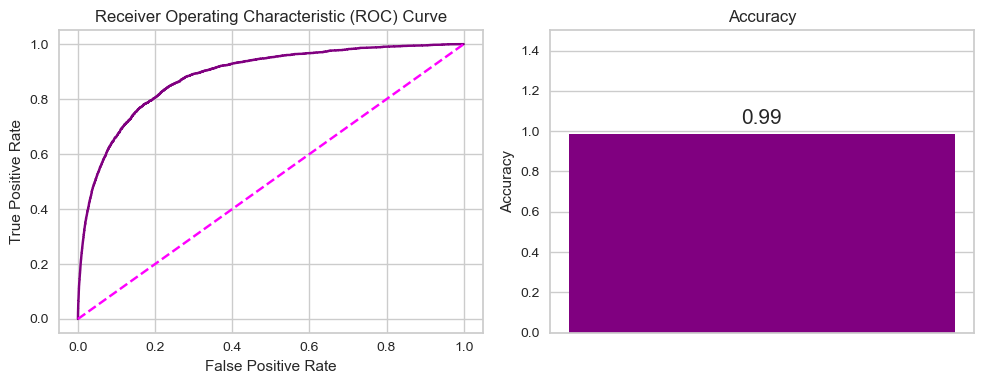

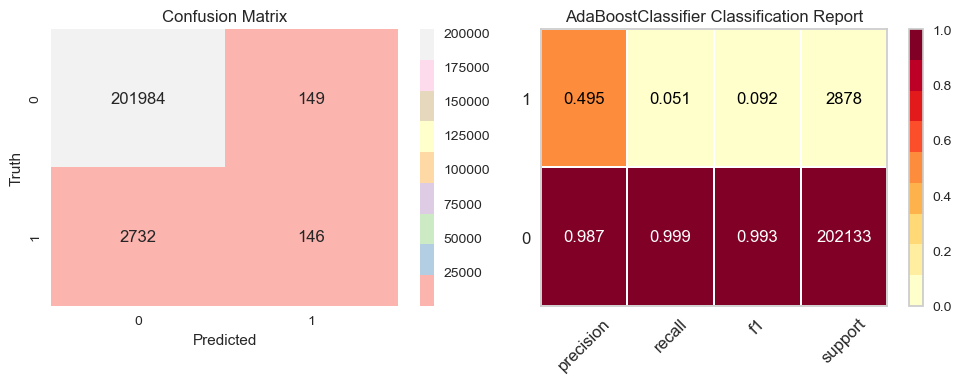

CPU times: total: 1min 46s
Wall time: 3min 2s


In [42]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [43]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.48, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    202133
           1       0.08      0.71      0.14      2878

    accuracy                           0.88    205011
   macro avg       0.54      0.79      0.54    205011
weighted avg       0.98      0.88      0.92    205011

[[177373  24760]
 [   835   2043]]


In [44]:
saved_model_path = experiment.save_model('pipeline_4_models/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/adaboost.pkl


# catboost

In [45]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=200,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    depth=5,                    # Depth of the trees
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False,              # Set to True to display training progress
    class_weights=[1,80]
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x0000019834DF81F0>
Best score: 0.8952883843846233
AUC: 0.8920295675529444
TPR:  54.55% 
FPR:  4.99% 
Threshold:  0.76
Predictive Equality:  100.0%


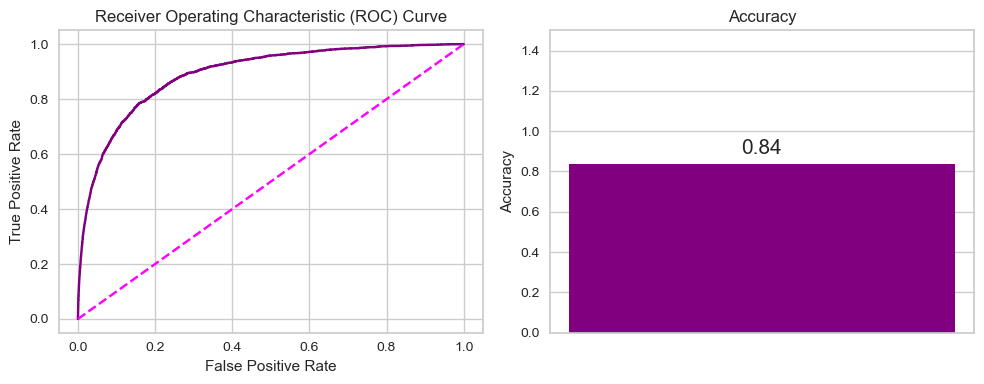

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    202133
           1       0.06      0.79      0.12      2878

    accuracy                           0.84    205011
   macro avg       0.53      0.81      0.51    205011
weighted avg       0.98      0.84      0.90    205011

CPU times: total: 19.4 s
Wall time: 32.8 s


In [46]:
%%time
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [47]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.76, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.55      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191877  10256]
 [  1298   1580]]


In [48]:
saved_model_path = experiment.save_model('pipeline_4_models/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/catboost.pkl


# LGBM:

In [72]:
from lightgbm import LGBMClassifier
# Define the LGBMClassifier
lgbm_model = LGBMClassifier(scale_pos_weight=80)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [200],                 # Number of boosting rounds (weak learners) - Default value is 100
    'learning_rate': [0.1],                # Learning rate for each boosting round - Default value is 0.1
    'max_depth': [7],                     # Maximum depth of the trees - Default value is -1 (unlimited)
    'num_leaves': [15],                    # Maximum number of leaves in one tree - Default value is 31
    'min_child_samples': [20],             # Minimum number of data points in a leaf - Default value is 20
}
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Info] Number of positive: 8151, number of negative: 786838
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2952
[LightGBM] [Info] Number of data points in the train set: 794989, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010253 -> initscore=-4.569882
[LightGBM] [Info] Start training from score -4.569882
Best hyperparameters: {'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1}
Best estimator: LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=15,
               scale_pos_weight=80)
Best score: 0.884037998520961
AUC: 0.8758024869079811
TPR:  49.44% 
FPR:  4.99% 
Threshold:  0.82
Predictive Equality:  100.0%


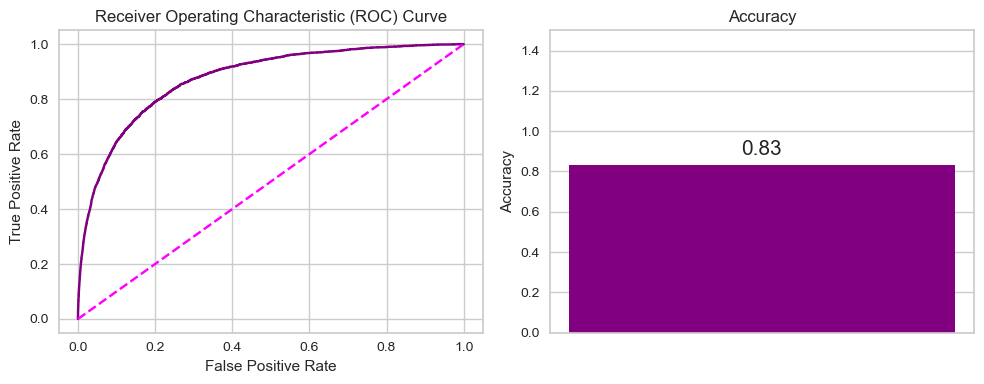

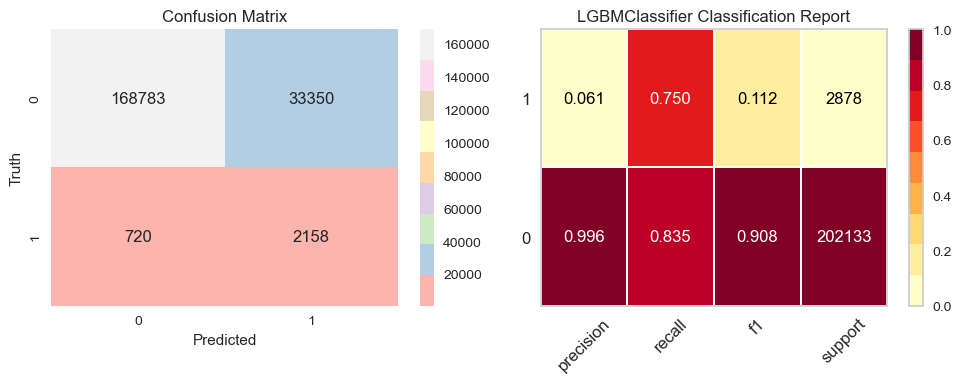

In [73]:
experiment.train(lgbm_model,param_grid=param_grid,search_type='random')

In [74]:
res=experiment.best.predict_proba(X_test)[:,1]
res=np.where(res>0.82,1,0)
print(classification_report(y_test,res))
print(confusion_matrix(y_test,res))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.49      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.72      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[192000  10133]
 [  1454   1424]]


In [75]:
saved_model_path = experiment.save_model('pipeline_4_models/lgbm.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/lgbm.pkl


## Summary and Comments on Each Model:

1. **Logistic Regression**:
   - AUC: 0.860210823767439
   - TPR: 45.52%
   - FPR: 5.00%
   - Threshold: 0.75
   - Predictive Equality: 100.00%
   - Comments: The logistic regression model performs reasonably well, with a good AUC and TPR. The Predictive Equality score of 100.00% indicates excellent fairness, with no disparity in the False Positive Rate (FPR) across protected groups, making it a highly fair model.

2. **Random Forest**:
   - AUC: 0.871224036718584
   - TPR: 47.12%
   - FPR: 4.96%
   - Threshold: 0.63
   - Predictive Equality: 100.00%
   - Comments: The random forest model shows improved fairness compared to previous models, with a high Predictive Equality score of 100.00%. However, its AUC and TPR are not as high as some other models.

3. **XGBoost**:
   - AUC: 0.8844622053677997
   - TPR: 52.47%
   - FPR: 5.00%
   - Threshold: 0.75
   - Predictive Equality: 100.00%
   - Comments: XGBoost demonstrates good AUC and TPR. The Predictive Equality score of 100.00% indicates perfect fairness, with no disparity in FPR between protected groups, making it an excellent choice for fairness-sensitive tasks.

4. **Deep Learning**:
   - AUC: 0.8835960545755197
   - TPR: 51.39%
   - FPR: 5.00%
   - Threshold: 0.96
   - Predictive Equality: 100.00%
   - Comments: The deep learning model performs well, with good AUC and TPR. Its Predictive Equality score of 100.00% suggests perfect fairness, with no disparity in FPR across protected groups.

5. **AdaBoost**:
   - AUC: 0.8850090083560428
   - TPR: 52.50%
   - FPR: 5.00%
   - Threshold: 0.48
   - Predictive Equality: 100.00%
   - Comments: AdaBoost achieves high fairness with a perfect Predictive Equality score of 100.00%. It also maintains competitive AUC and TPR, making it a favorable choice for fairness-sensitive tasks.

6. **CatBoost**:
   - AUC: 0.8920295675529444
   - TPR: 54.55%
   - FPR: 4.99%
   - Threshold: 0.76
   - Predictive Equality: 100.00%
   - Comments: CatBoost demonstrates good AUC and TPR, indicating its predictive power. The Predictive Equality score of 100.00% indicates perfect fairness, with no disparity in FPR between protected groups.

7. **LGBM**:
   - AUC: 0.8758024869079811
   - TPR: 49.44%
   - FPR: 4.99%
   - Threshold: 0.82
   - Predictive Equality: 100.00%
   - Comments: LGBM exhibits moderate AUC and TPR, indicating predictive ability. However, the Predictive Equality score of 100.00% suggests excellent fairness, with no disparity in FPR across protected groups, making it a highly fair model.

**Summary:**
- AdaBoost, CatBoost, XGBoost, Deep Learning, and LGBM models achieve perfect fairness, with Predictive Equality scores of 100.00%.
- These models maintain competitive AUC and TPR, making them top contenders for fairness-sensitive applications.
- Logistic Regression and Random Forest show good performance but have some room for improvement in fairness compared to the other models.
- Based on fairness and overall performance, AdaBoost, CatBoost, XGBoost, Deep Learning, and LGBM appear to be the top contenders among the models evaluated.

# Tuning the best model:


In [76]:
from catboost import CatBoostClassifier

# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'iterations': np.arange(100, 1000, 100),  # Number of boosting iterations
    'depth': [3,4,5],               # Depth of the trees
    'learning_rate': [0.01, 0.1], # Learning rate
    'l2_leaf_reg': [1, 3, 5],             # L2 regularization coefficient
    'class_weights':[{0:1,1:80}],
    'verbose':[0]
}

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best hyperparameters: {'verbose': 0, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 600, 'depth': 3, 'class_weights': {0: 1, 1: 80}}
Best estimator: <catboost.core.CatBoostClassifier object at 0x0000019835210D60>
Best score: 0.8962352816846186
AUC: 0.8932451836191342
TPR:  54.790000000000006% 
FPR:  4.99% 
Threshold:  0.77
Predictive Equality:  100.0%


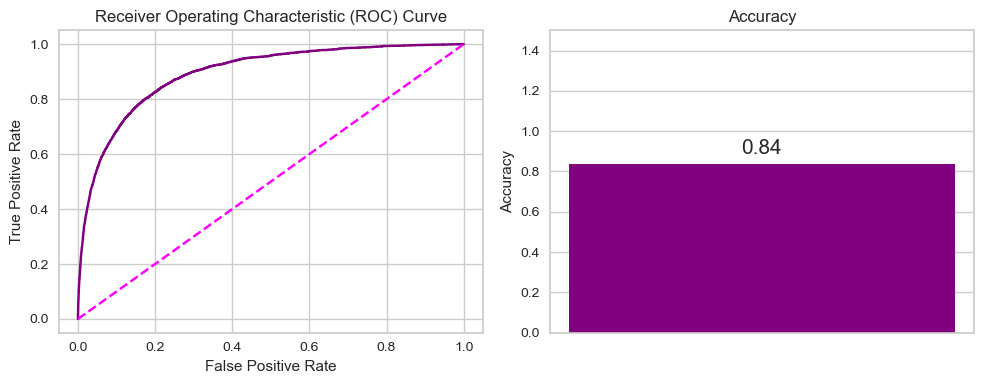

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    202133
           1       0.06      0.79      0.12      2878

    accuracy                           0.84    205011
   macro avg       0.53      0.81      0.51    205011
weighted avg       0.98      0.84      0.90    205011

CPU times: total: 40.1 s
Wall time: 7min 49s


In [77]:
%%time
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost_model,param_grid=param_grid,search_type='random')

In [78]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]


In [79]:
y_pred_new_threshold = np.where(y_pred >= 0.77, 1, 0)

In [80]:
print(classification_report(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.55      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011



In [81]:
print(confusion_matrix(y_test,y_pred_new_threshold))

[[191826  10307]
 [  1291   1587]]


In [83]:
saved_model_path = experiment.save_model('pipeline_4_models/catboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_models/catboost_after_tuning.pkl


## final comment
- as we can see the trade off between the predictive equality and the accuracy is high this is because we suffer from class imbalance problem in the next step we will purpose another techniques to solve the imbalanced dataset problem.
- as we after using the 0.49 as new threshold, leads to many false positive (non fraud to be detected as fraud).
- so yes the model is fair but it is failed in the main purpose which is detecting the fraud and non fraud requests.